In [4]:
!ls ~/ray_results/

besthps_5seeds		    sweep_kradmm_mnist
besthps_shampoo_32b_curves  sweep_kradmm_mnist_iter
besthps_shampoo_32b_faces   sweep_krad_mnist
besthps_shampoo_32b_mnist   sweep_krad_mnist_iter
sweep_adam_curves	    sweep_sgd_curves
sweep_adam_faces	    sweep_sgd_curves_asha
sweep_adam_mnist	    sweep_sgd_faces
sweep_krad_curves	    sweep_sgd_faces_asha
sweep_krad_curves_iter	    sweep_sgd_mnist
sweep_krad_faces	    sweep_sgd_mnist_asha
sweep_krad_faces_iter	    sweep_shampoo_curves
sweep_kradmm_curves	    sweep_shampoo_faces
sweep_kradmm_curves_iter    sweep_shampoo_faces_blk100
sweep_kradmm_faces	    sweep_shampoo_mnist
sweep_kradmm_faces_iter     sweep_shampoo_mnist_blk100


In [1]:
import os
import json
from tb_to_df import convert_tb_data

root_dir = '/home/luke.walters/ray_results'

df = convert_tb_data(root_dir)


def extract_params(root):
    
    root = root.split('/tb')[0]
      
    params_json_path = os.path.join(root, 'params.json')
    
    with open(params_json_path) as f:
        p = json.load(f)
    
    if "blk" in root:
        dataset = root.split('/tune_with')[0].split('_')[-2]
        opt = p['optimizer'] + '_blk100'
    elif "iter" in root or "asha" in root:
        dataset = root.split('/tune_with')[0].split('_')[-2]
        opt = p['optimizer']
    else:
        dataset = root.split('/tune_with')[0].split('_')[-1]
        opt = p['optimizer']
    
    return p['lr'], opt, p['seed'], p['eps'], dataset


df['lr'], df['optimizer'],df['seed'], df['eps'], df['dataset'] = zip(*df['root'].map(extract_params))


df = df.query('seed == 100')


df['optimizer'][df.optimizer == 'krad'] = 'krad*'
df['optimizer'][df.optimizer == 'kradmm'] = 'krad'

2023-02-16 06:44:00.909032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 06:44:01.698463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/x86_64-linux-gnu::/usr/lib/cuda/include:/usr/lib/cuda/lib64:/usr/lib/x86_64-linux-gnu:
2023-02-16 06:44:01.698542: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRAR

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Failed to read /home/luke.walters/ray_results/sweep_sgd_mnist/tune_with_parameters_9fba9_00005_5_eps=0.0000,lr=0.0030,optimizer=sgd,seed=100_2023-02-03_15-36-50/tb/events.out.tfevents.1675467415.hq-prdgsv01.3315250.0
Failed to read /home/luke.walters/ray_results/sweep_sgd_mnist/tune_with_parameters_9fba9_00010_10_eps=0.0000,lr=1,optimizer=sgd,seed=100_2023-02-03_15-36-50/tb/events.out.tfevents.1675467414.hq-prdgsv01.3315260.0
Failed to read /home/luke.walters/ray_results/sweep_sgd_mnist/tune_with_parameters_9fba9_00000_0_eps=0.0000,lr=0.0000,optimizer=sgd,seed=100_2023-02-03_15-36-47/tb/events.out.tfevents.1675467411.hq-prdgsv01.3315030.0
Failed to read /home/luke.walters/ray_results/sweep_sgd_mnist/tune_with_parameters_9fba9_00007_7_eps=0.0000,lr=0.0300,optimizer=sgd,seed=100_2023-02-03_15-36-50/tb/events.out.tfevents.1675467414.hq-prdgsv01.3315254.0
Failed to read /home/luke.walters/ray_results/sweep

/tmp/ipykernel_1979734/1966554917.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['optimizer'][df.optimizer == 'kradmm'] = 'krad'


In [3]:
dfs

,wall_time,name,step,value,root,lr,optimizer,seed,eps,dataset


In [4]:
df.optimizer.unique()

array(['sgd', 'krad*', 'adam', 'krad', 'shampoo', 'shampoo_blk100',
       'shampoo_32b'], dtype=object)

In [115]:
df

,wall_time,name,step,value,root,lr,optimizer,seed,eps,dataset
0,1.675467e+09,ray/tune/val_loss,1.0,571.423950,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.00300,sgd,100,1.000000e-08,mnist
1,1.675467e+09,ray/tune/time_this_iter_s,1.0,16.095938,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.00300,sgd,100,1.000000e-08,mnist
2,1.675467e+09,ray/tune/done,1.0,0.000000,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.00300,sgd,100,1.000000e-08,mnist
3,1.675467e+09,ray/tune/time_since_restore,1.0,16.095938,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.00300,sgd,100,1.000000e-08,mnist
4,1.675467e+09,ray/tune/timesteps_since_restore,1.0,0.000000,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.00300,sgd,100,1.000000e-08,mnist
...,...,...,...,...,...,...,...,...,...,...
327079,1.675735e+09,Loss/train,4600.0,1.003481,/home/luke.walters/ray_results/sweep_shampoo_f...,0.00003,shampoo,100,1.000000e-01,faces
327080,1.675736e+09,Loss/train,4700.0,1.000970,/home/luke.walters/ray_results/sweep_shampoo_f...,0.00003,shampoo,100,1.000000e-01,faces
327081,1.675736e+09,Loss/train,4800.0,1.000823,/home/luke.walters/ray_results/sweep_shampoo_f...,0.00003,shampoo,100,1.000000e-01,faces
327082,1.675737e+09,Loss/train,4900.0,0.998475,/home/luke.walters/ray_results/sweep_shampoo_f...,0.00003,shampoo,100,1.000000e-01,faces


array(['mnist', 'curves', 'faces'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mnist
    sgd, best lr = 0.005202065647994061, best eps = 1e-08, loss=519.0703735351562, step=40200.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad*, best lr = 0.0014476127334869218, best eps = 0.00029996716730566444, loss=516.7928466796875, step=40200.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    adam, best lr = 0.0003, best eps = 0.0001, loss=517.3539428710938, step=41400.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad, best lr = 0.006274716145523561, best eps = 0.0008497886769743537, loss=517.6387329101562, step=39000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo, best lr = 0.001, best eps = 0.01, loss=516.1746826171875, step=40200.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo_blk100, best lr = 0.001, best eps = 0.001, loss=516.2415771484375, step=38400.0
    shampoo_32b, best lr = 0.001, best eps = 0.01, loss=516.1907348632812, step=40200.0
curves


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    sgd, best lr = 0.001, best eps = 1e-08, loss=170.5153045654297, step=25600.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad*, best lr = 0.003026497683160267, best eps = 0.03172239956974881, loss=169.1831817626953, step=28800.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    adam, best lr = 0.001, best eps = 0.001, loss=169.44638061523438, step=29000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad, best lr = 0.013209688249038856, best eps = 0.0050518855629835815, loss=169.43978881835938, step=28400.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo, best lr = 0.0018549241658968494, best eps = 0.0005833189490283865, loss=168.98133850097656, step=28800.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo_32b, best lr = 0.0018549241658968494, best eps = 0.0005833189490283865, loss=169.05276489257812, step=27200.0
faces
    sgd, best lr = 0.1, best eps = 1e-08, loss=0.04109591245651245, step=150075.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad*, best lr = 0.1898261170344016, best eps = 0.0002018742365353528, loss=0.0368158295750618, step=150075.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    adam, best lr = 0.003, best eps = 0.001, loss=0.037849728018045425, step=155250.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    krad, best lr = 0.3203595884575303, best eps = 0.00010109009760800876, loss=0.04157735034823418, step=146970.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo, best lr = 0.30644117988866537, best eps = 0.003565049429323051, loss=0.03545249253511429, step=154215.0


/tmp/ipykernel_125065/1283239068.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    shampoo_blk100, best lr = 0.0003, best eps = 0.001, loss=0.9992784261703491, step=10350.0
    shampoo_32b, best lr = 0.30644117988866537, best eps = 0.003565049429323051, loss=0.03542161360383034, step=154215.0


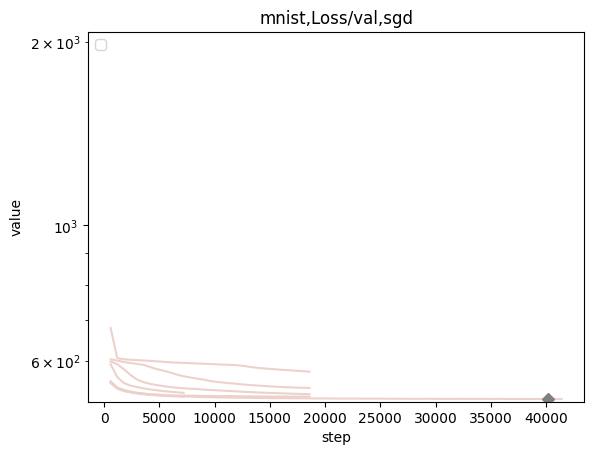

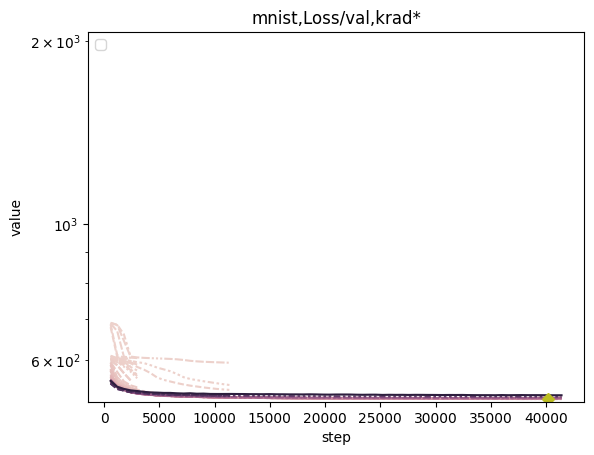

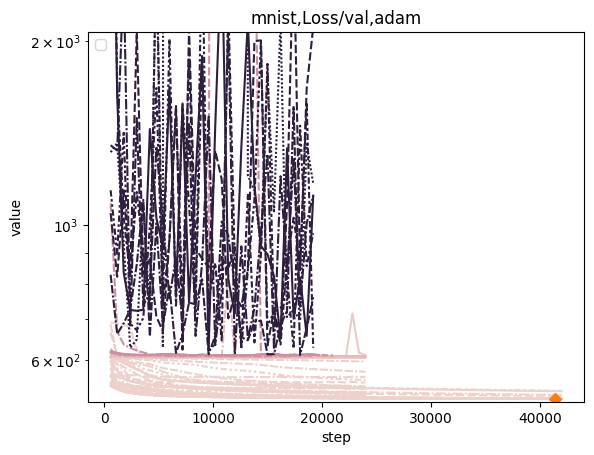

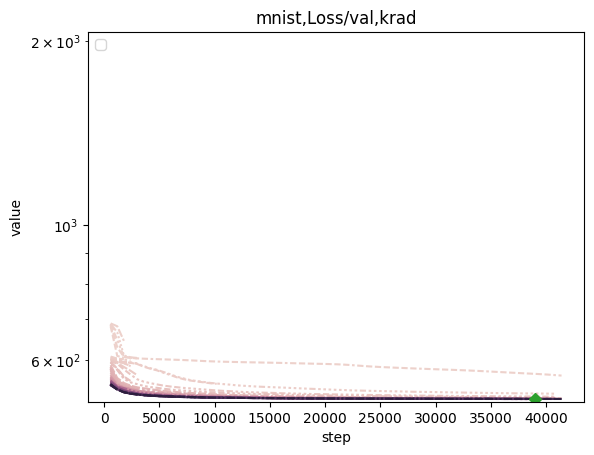

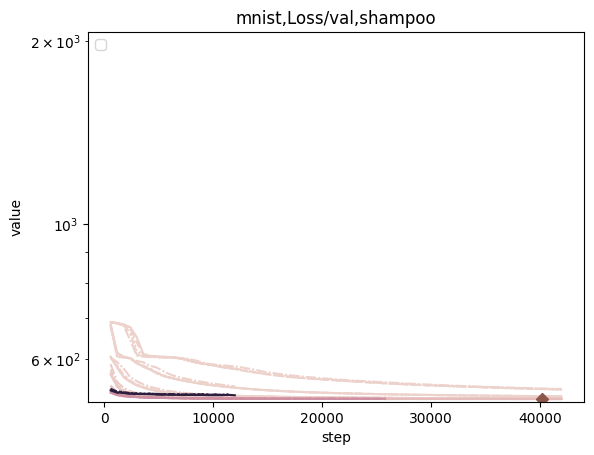

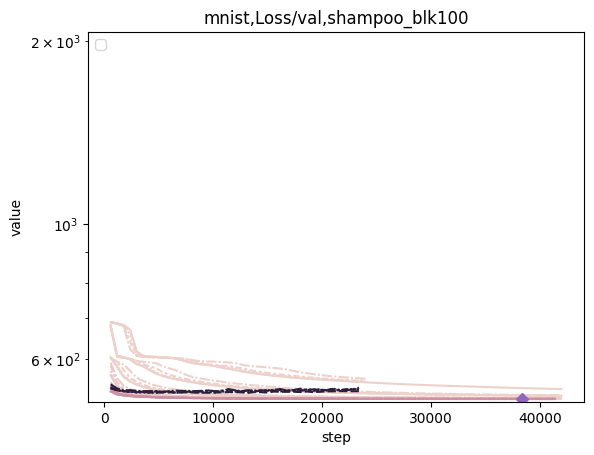

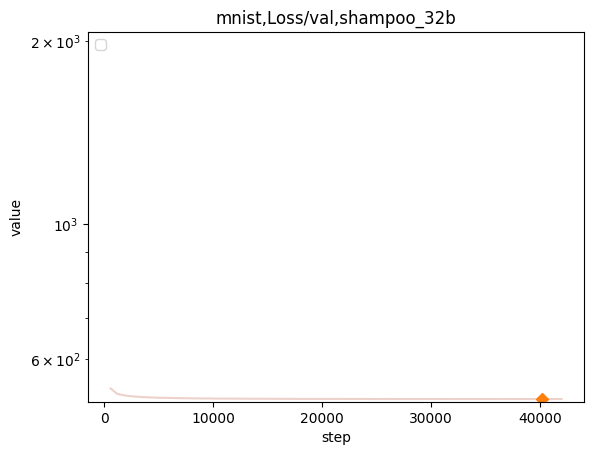

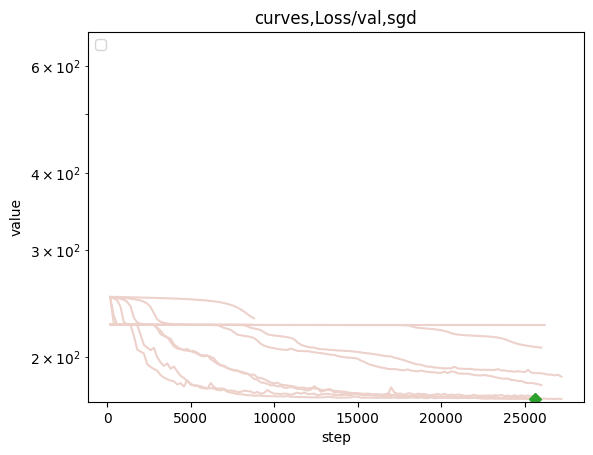

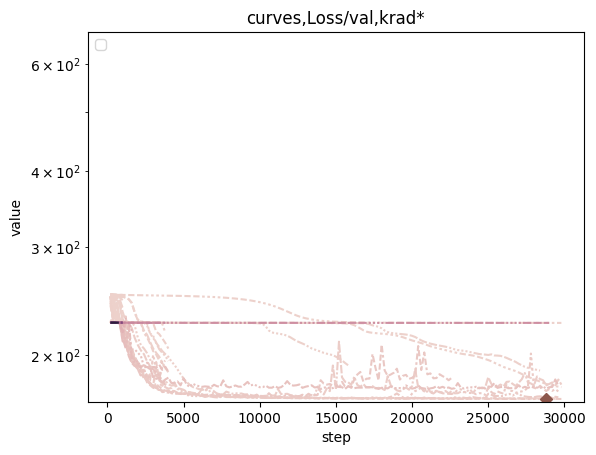

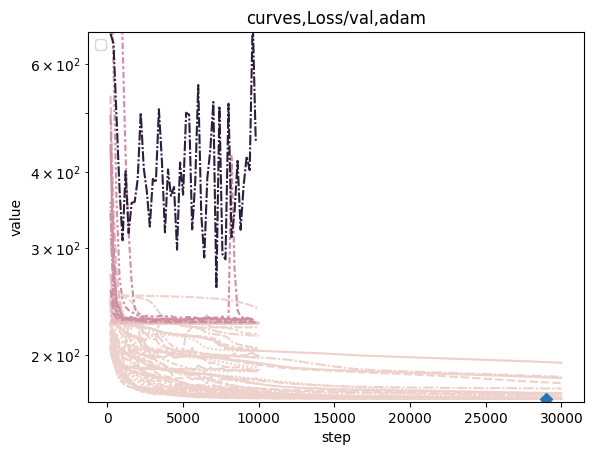

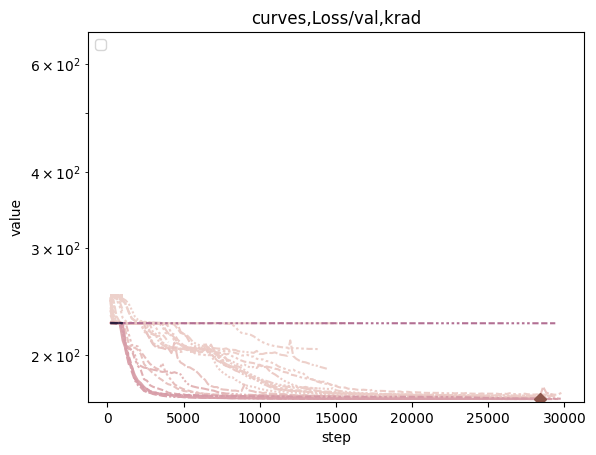

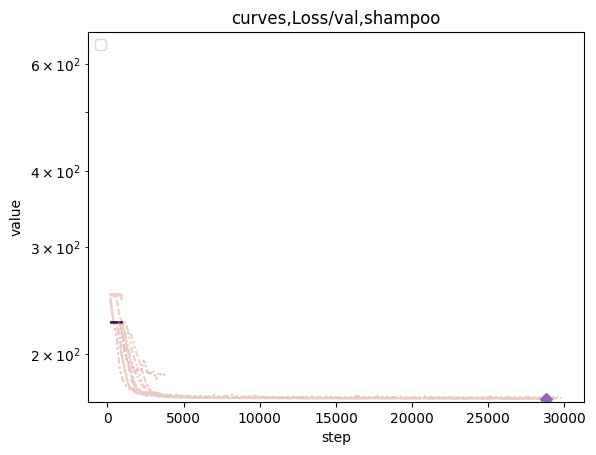

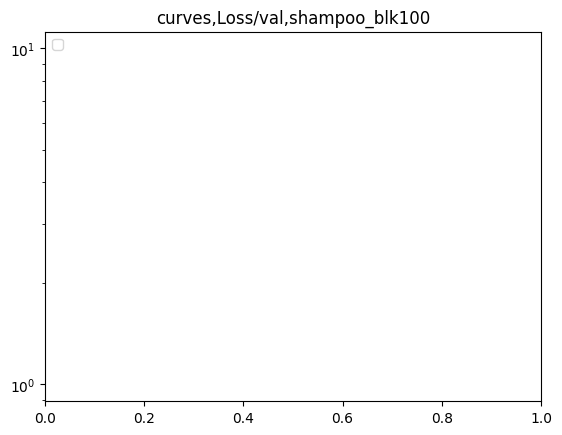

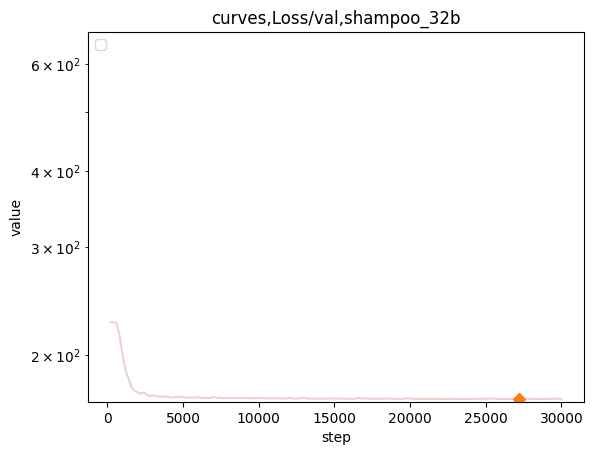

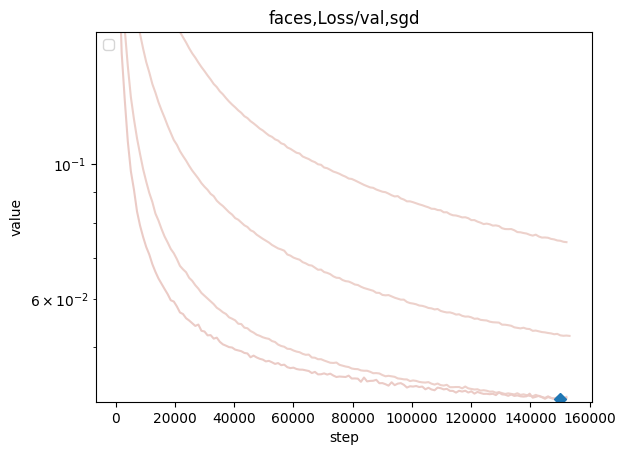

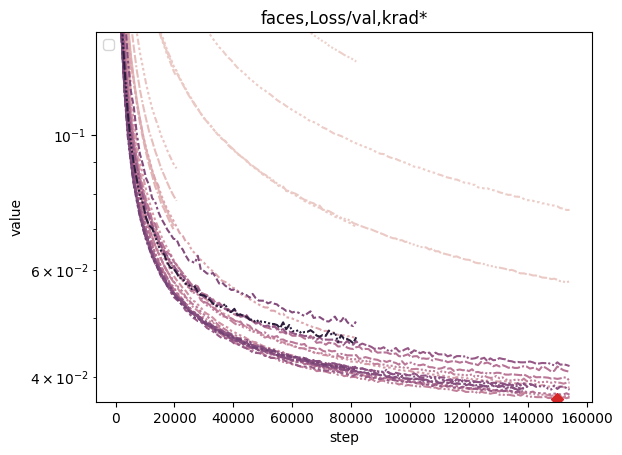

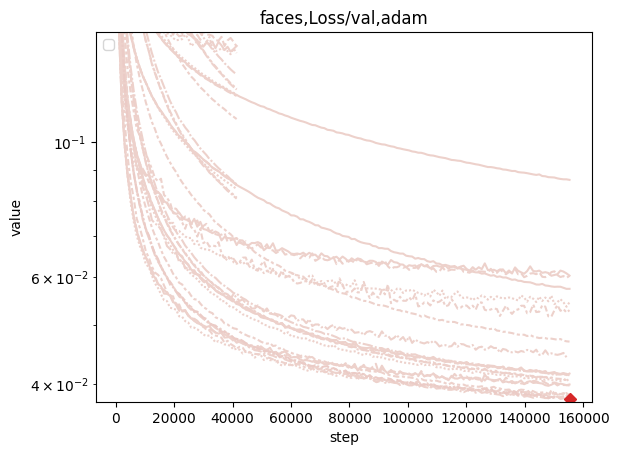

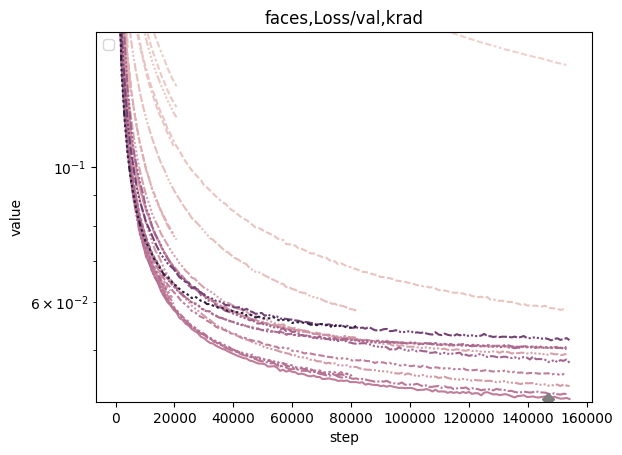

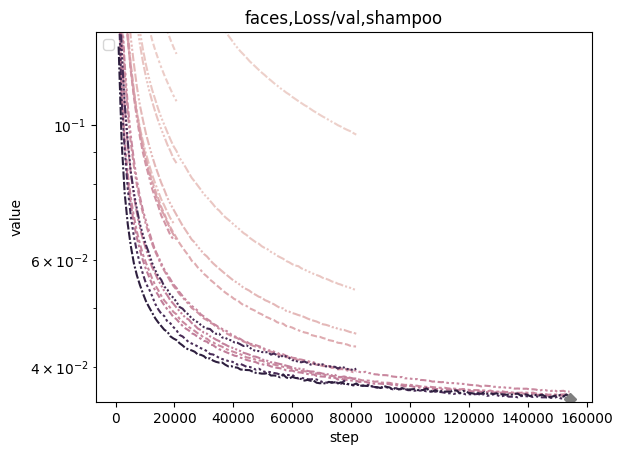

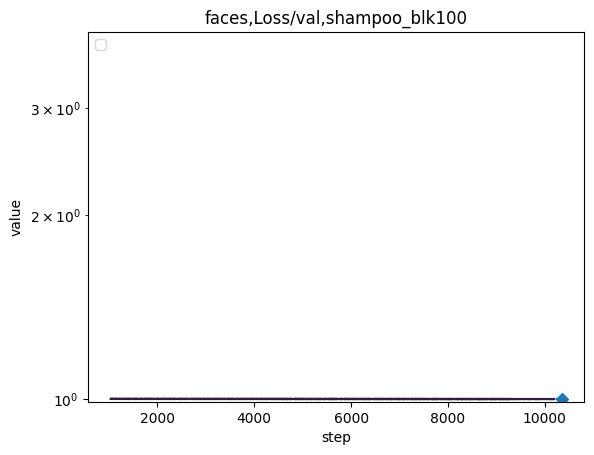

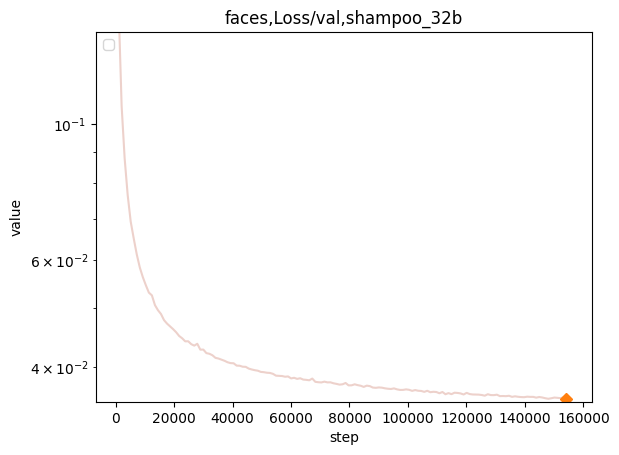

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns




best_lrs_ds = {}
best_epochs_ds = {}
best_vals_ds = {}
best_epss_ds = {}
best_runs_ds = {}

for dataset in df.dataset.unique():
    print(dataset)
    best_lrs = {}
    best_epochs = {}
    best_vals = {}
    best_epss = {}
    best_runs = {}
    for curve in ['Loss/val']:
       
        for opt in df.optimizer.unique():

            
            df_plot = df.query(f'dataset == "{dataset}"').query(f'optimizer == "{opt}"').query(f'name == "{curve}"')
         
        
    
            plt.figure(),
            ax=sns.lineplot(df_plot, x='step',y='value', hue='lr', style='eps', legend=None), 
            plt.title(dataset+','+curve+','+opt)
            ax[0].set_yscale('log'), plt.legend(loc='upper left')
           
            
            df_ag=df_plot.groupby(['step','lr','eps']).agg('min').reset_index()
            min_val = df_ag[df_ag.value == df_ag.value.min()]
            
         
            if len(min_val):
                best_lr= min_val.lr.values[0]
                best_step = min_val.step.values[0]
                best_val = min_val.value.values[0]
                best_eps = min_val.eps.values[0]
                best_run = min_val.root.values[0].split('parameters_')[1]
                plt.plot(best_step,best_val,marker="D")
                plt.ylim([.99*best_val, 4*best_val])

                print(f"    {opt}, best lr = {best_lr}, best eps = {best_eps}, loss={best_val}, step={best_step}")

                best_lrs[opt]=best_lr
                best_epochs[opt] = best_step
                best_vals[opt] = best_val
                best_epss[opt] = best_eps
                best_runs[opt] = best_run
    best_lrs_ds[dataset] = best_lrs
    best_epochs_ds[dataset] = best_epochs
    best_vals_ds[dataset] = best_vals
    best_epss_ds[dataset] = best_epss
    best_runs_ds[dataset]= best_runs
    


In [29]:
json.dump?

In [9]:
from pprint import pprint



best_hps = {}

for ds in ["mnist","curves","faces"]:
    
    opts = {}
    for opt in ['sgd','adam', 'shampoo', 'krad*','krad']:
        opts[opt] = {'lr': best_lrs_ds[ds][opt], "eps":best_epss_ds[ds][opt]}
        
    best_hps[ds] = opts   
        
pprint(best_hps)
   


# import json

# with open('best_lrs.json','w') as f:
#     json.dump(best_lrs_ds,f)
    
    
# with open('best_eps.json','w') as f:
#     json.dump(best_epss_ds,f)
    

{'curves': {'adam': {'eps': 0.001, 'lr': 0.001},
            'krad': {'eps': 0.0050518855629835815, 'lr': 0.013209688249038856},
            'krad*': {'eps': 0.03172239956974881, 'lr': 0.003026497683160267},
            'sgd': {'eps': 1e-08, 'lr': 0.001},
            'shampoo': {'eps': 0.0005833189490283865,
                        'lr': 0.0018549241658968494}},
 'faces': {'adam': {'eps': 0.001, 'lr': 0.003},
           'krad': {'eps': 0.00010109009760800876, 'lr': 0.3203595884575303},
           'krad*': {'eps': 0.0002018742365353528, 'lr': 0.1898261170344016},
           'sgd': {'eps': 1e-08, 'lr': 0.1},
           'shampoo': {'eps': 0.003565049429323051, 'lr': 0.30644117988866537}},
 'mnist': {'adam': {'eps': 0.0001, 'lr': 0.0003},
           'krad': {'eps': 0.0008497886769743537, 'lr': 0.006274716145523561},
           'krad*': {'eps': 0.00029996716730566444,
                     'lr': 0.0014476127334869218},
           'sgd': {'eps': 1e-08, 'lr': 0.005202065647994061},
           

In [48]:
df.query('optimizer == "adam"').lr.unique()


array([3.e-03, 3.e-04, 3.e+00, 1.e+01, 3.e-05, 1.e-05, 1.e-01, 1.e-04,
       3.e-01, 3.e-02, 1.e+00, 1.e-02, 1.e-03])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='step', ylabel='value'>)

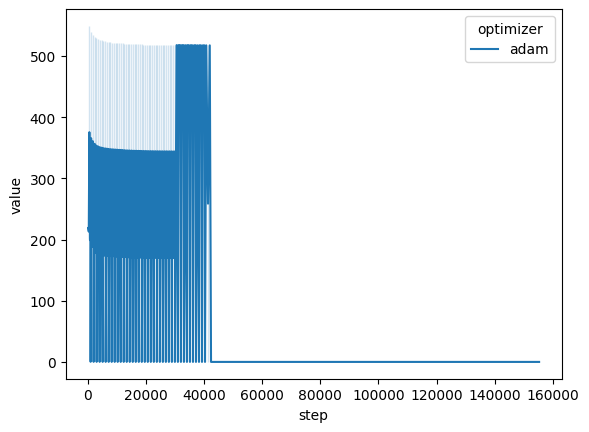

In [101]:
df_p=df.query(f'optimizer == "adam"').query(f'lr == {0.0003}').query(f'eps == {0.0001}').query('name == "Loss/val"')

plt.figure(), sns.lineplot(df_p, x='step',y='value', hue = 'optimizer')

In [111]:
df_p.head(100)

,wall_time,name,step,value,root,lr,optimizer,seed,eps,dataset
5817,1.675467e+09,Loss/val,600.0,551.670715,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.01,sgd,100,1.000000e-08,mnist
5824,1.675467e+09,Loss/val,1200.0,539.749451,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.01,sgd,100,1.000000e-08,mnist
5831,1.675467e+09,Loss/val,1800.0,534.765991,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.01,sgd,100,1.000000e-08,mnist
5838,1.675467e+09,Loss/val,2400.0,532.712402,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.01,sgd,100,1.000000e-08,mnist
5845,1.675467e+09,Loss/val,3000.0,531.049622,/home/luke.walters/ray_results/sweep_sgd_mnist...,0.01,sgd,100,1.000000e-08,mnist
...,...,...,...,...,...,...,...,...,...,...
296499,1.675471e+09,Loss/val,13000.0,173.777527,/home/luke.walters/ray_results/sweep_sgd_curve...,0.01,sgd,100,1.000000e-08,curves
296502,1.675471e+09,Loss/val,13200.0,173.937149,/home/luke.walters/ray_results/sweep_sgd_curve...,0.01,sgd,100,1.000000e-08,curves
296505,1.675471e+09,Loss/val,13400.0,173.640182,/home/luke.walters/ray_results/sweep_sgd_curve...,0.01,sgd,100,1.000000e-08,curves
296508,1.675471e+09,Loss/val,13600.0,173.033707,/home/luke.walters/ray_results/sweep_sgd_curve...,0.01,sgd,100,1.000000e-08,curves


In [2]:
import pandas as pd


for k,ds in enumerate(best_lrs_ds.keys()):

# for ds in ['mnist']:
    
    best_lrs = best_lrs_ds[ds]
    best_eps = best_epss_ds[ds]

    df_list = []

    for opt,lr in best_lrs.items():
       
        if opt == "shampoo_blk100":
            continue
        eps = best_eps[opt]
        print(ds, opt, lr, eps)

        df_list.append(df.query(f'dataset == "{ds}"').query(f'optimizer == "{opt}"').query(f'lr == {lr}').query(f'eps == {eps}'))

    df_plot = pd.concat(df_list)

    hue_order = ['sgd','adam']

    for curve in ['Loss/val']:
    # for curve in df_plot.name.unique():
        if 'ray' in curve:
            continue
        if 'hparams' in curve:
            continue

        df_p = df_plot.query(f'name == "{curve}"')

        



        f=plt.figure(1), 
#         sp = plt.subplot(int(f"31{k+1}"))
        ax=sns.lineplot(df_p, x='step',y='value', hue = 'optimizer', hue_order=['sgd','adam','shampoo','krad*','krad','shampoo_32b'])
        f[0].set_figheight(13)
        f[0].set_figwidth(6)
        f[0].tight_layout(pad=1.0)
        
#         ax.set_yscale('log')
        if ds == 'faces':
            
            plt.xlim([0,150000])
            plt.ylim([.035, .08])
        
        elif ds == 'mnist':
            plt.xlim([0,40000])
            plt.ylim([515,535])
        
        elif ds == 'curves':
            plt.xlim([0,25000])
            plt.ylim([168,180])
            
        plt.title(f"{ds}(autoencoder)"), plt.ylabel('Validation Loss'), plt.xlabel('Training Iterations')


        if 0:
            df_min = df_p.groupby(['step']).agg('min').reset_index()
            for step in df_min.step.unique():
                step_series = df_p.step == step
                df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])

            plt.figure(), 
            sns.lineplot(df_p, x='step',y='value', hue = 'optimizer',hue_order=['sgd','adam','shampoo','shampoo_32b','krad','krad*']), 
            plt.title(ds)



NameError: name 'best_lrs_ds' is not defined

/tmp/ipykernel_3921550/2277816222.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()


,optimizer,value
0,adam,0.833498
1,krad,0.830442
2,kradmm,0.840525
3,sgd,0.839025
4,shampoo,0.835048


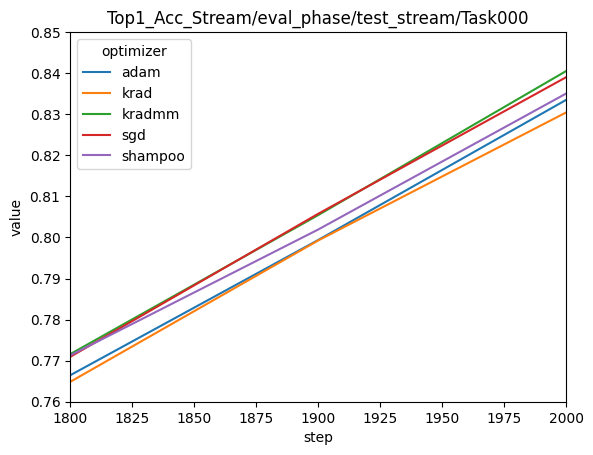

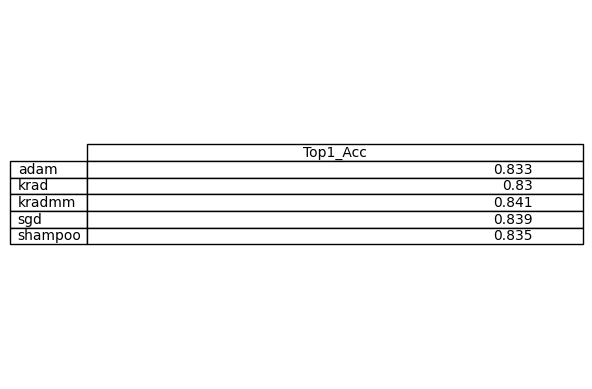

In [209]:
#Test stream final performance

curve = 'Top1_Acc_Stream/eval_phase/test_stream/Task000'
df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

plt.figure(), sns.lineplot(df_best, x='step',y='value', hue = 'optimizer'), plt.title(curve),
plt.xlim([1800,2000]), plt.ylim([.76,.85])

df_bs=df_best.query('step == 2000')

plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
plt.axis('off')

df_bs[['optimizer','value']].reset_index(drop=True)
    

In [226]:
pd.DataFrame?

/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

,E00,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
adam,0.838,0.836,0.844,0.838,0.839,0.841,0.847,0.840,0.840,0.843,0.841,0.837,0.839,0.838,0.836,0.836,0.836,0.827,0.819,0.754
krad,0.835,0.833,0.833,0.838,0.838,0.832,0.839,0.843,0.843,0.839,0.839,0.844,0.846,0.838,0.833,0.840,0.841,0.836,0.814,0.704
kradmm,0.829,0.841,0.831,0.843,0.838,0.839,0.841,0.840,0.846,0.851,0.847,0.849,0.844,0.849,0.846,0.844,0.847,0.848,0.838,0.799
sgd,0.827,0.834,0.837,0.822,0.836,0.838,0.835,0.845,0.840,0.842,0.846,0.852,0.850,0.847,0.851,0.847,0.842,0.845,0.840,0.801
shampoo,0.837,0.840,0.837,0.832,0.839,0.842,0.838,0.846,0.840,0.838,0.844,0.843,0.839,0.844,0.853,0.846,0.846,0.843,0.840,0.716


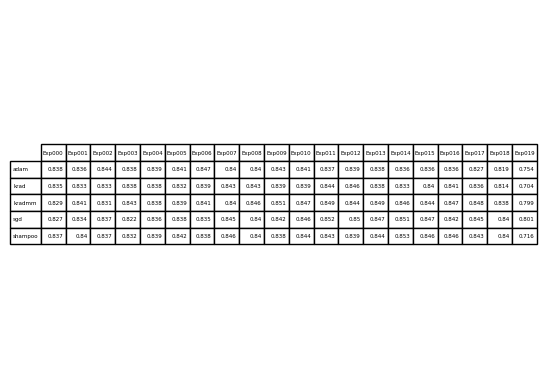

In [248]:
import numpy as np

# final performance per experience
table_columns = []
col_labels = []
row_labels = []
for curve in df_plot.name.unique():
    if 'ray' in curve:
        continue
    if 'hparams' in curve:
        continue
    exp = curve.split('/')[-1]
    
    if 'Task' in exp:
        continue
        
    df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

#     plt.figure(), sns.lineplot(df_mean, x='step',y='value', hue = 'optimizer'), plt.title(curve),
#     plt.xlim([1800,2000])

    df_final=df_mean.query('step == 2000')
    
    table_columns.append(df_final.value.to_list())
    col_labels.append(curve.split('/')[-1])
    row_labels.append(df_final.optimizer.to_list())


table_columns = np.transpose(table_columns)


plt.figure(), plt.table(cellText=np.round(table_columns,3), colLabels=col_labels, loc='center',rowLabels=row_labels[0], fontsize=100.0)
plt.axis('off')

df_exp = pd.DataFrame(data=np.round(table_columns,3), index = row_labels[0], columns = ['E'+x[-2::] for x in col_labels])
df_exp

# plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
# plt.axis('off')

# df_bs[['optimizer','value']].reset_index(drop=True)

In [242]:
plt.table?

In [158]:
df_p.groupby(['step']).agg('min').reset_index()

,step,wall_time,name,value,eps,lr,optimizer,seed
0,100.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.149635,0.0000,0.0010,adam,100
1,200.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.190635,0.0000,0.0010,adam,100
2,300.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.221850,0.0000,0.0010,adam,100
3,400.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.260720,0.0000,0.0010,adam,100
4,500.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.296390,0.0000,0.0010,adam,100
5,600.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.331040,0.0000,0.0010,adam,100
6,700.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.358435,0.0000,0.0010,adam,100
7,800.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.403420,0.0000,0.0010,adam,100
8,900.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.435930,0.0000,0.0010,adam,100
9,1000.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.475215,0.0000,0.0010,adam,100


In [176]:
sns.lineplot?